# Validação do Algoritmo de Recomendação

Para a validação do modelo, cada portfólio foi dividido em dois conjuntos: 

- Treino: 70% dos dados
- Teste: 30% dos dados

Foram feitas recomendações em relação ao conjunto de treino e em seguida foi verificada quantas delas estão presentes no conjunto de teste. A acurácia foi calculada da seguinte forma:

$$\frac{len(Recommended \cap test)}{len(test)}$$

In [1]:
import pandas as pd
import preprocessing_lib as prep
import recommendation_lib as rec
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

plt.rcParams['xtick.labelsize']  = 16
plt.rcParams['ytick.labelsize']  = 16
plt.rcParams['axes.labelsize']   = 16
plt.rcParams['axes.titlesize']   = 16
plt.rcParams['legend.fontsize']  = 16

In [2]:
def accuracy(port_test, rec_leads):
    tp = rec_leads['id'].isin(port_test['id']).sum()
    return tp/len(port_test)

In [3]:
df = prep.loading_data('../data/estaticos_market.csv')
df_processed = prep.process(df)
df_transformed = prep.transform(df_processed)

In [4]:
kmeans = rec.kMeans_training(df_transformed, n_clusters=7)

market_labels = rec.market_clusters(kmeans)

### Portfolio 1

In [5]:
portfolio1 = pd.read_csv('../data/estaticos_portfolio1.csv', index_col=0)
port_train_1, port_test_1 = train_test_split(portfolio1, test_size=0.3)
port_train_1 = rec.portfolio_clusters(market_labels, port_train_1)

In [6]:
acc1 = []
for i in range(100,10101,1000):
    rec_leads = rec.recommend_leads(port_train_1, df, market_labels,i)
    acc1.append(accuracy(port_test_1, rec_leads))

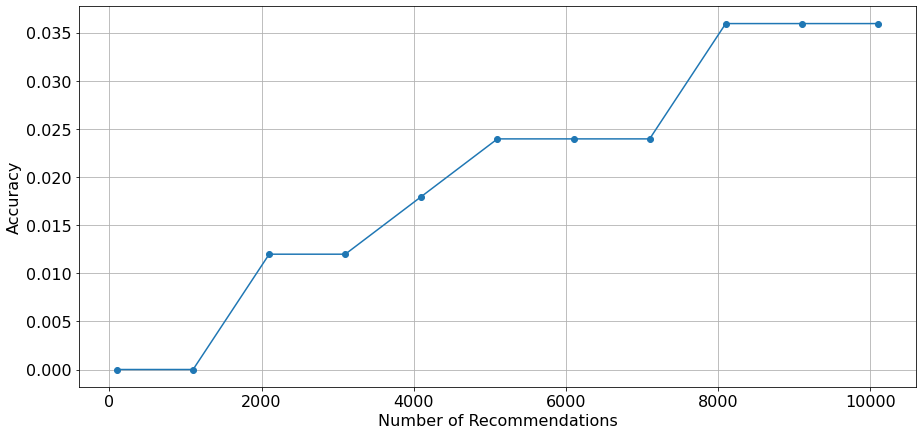

In [7]:
k = list(range(100,10101,1000))

plt.figure(figsize=(15,7))
plt.plot(k,acc1,'-o');
plt.grid()
plt.xlabel('Number of Recommendations')
plt.ylabel('Accuracy')
plt.show()

### Portfólio 2

In [8]:
portfolio2 = pd.read_csv('../data/estaticos_portfolio2.csv', index_col=0)
port_train_2, port_test_2 = train_test_split(portfolio2, test_size=0.3)
port_train_2 = rec.portfolio_clusters(market_labels, port_train_2)

In [9]:
acc2 = []
for i in range(100,10101,1000):
    rec_leads = rec.recommend_leads(port_train_2, df, market_labels,i)
    acc2.append(accuracy(port_test_2, rec_leads))

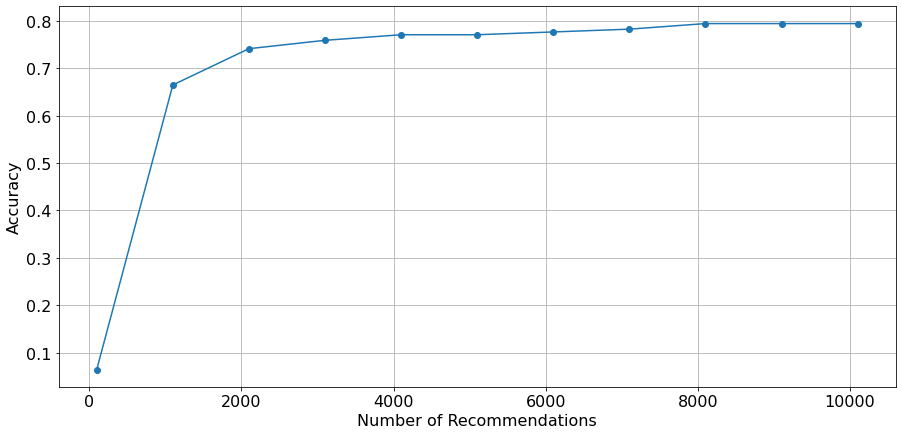

In [10]:
k = list(range(100,10101,1000))

plt.figure(figsize=(15,7))
plt.plot(k,acc2,'-o');
plt.grid()
plt.xlabel('Number of Recommendations')
plt.ylabel('Accuracy')
plt.show()

### Portfólio 3

In [11]:
portfolio3 = pd.read_csv('../data/estaticos_portfolio3.csv', index_col=0)
port_train_3, port_test_3 = train_test_split(portfolio3, test_size=0.3)
port_train_3 = rec.portfolio_clusters(market_labels, port_train_3)

In [12]:
acc3 = []
for i in range(100,10101,1000):
    rec_leads = rec.recommend_leads(port_train_3, df, market_labels,i)
    acc3.append(accuracy(port_test_3, rec_leads))

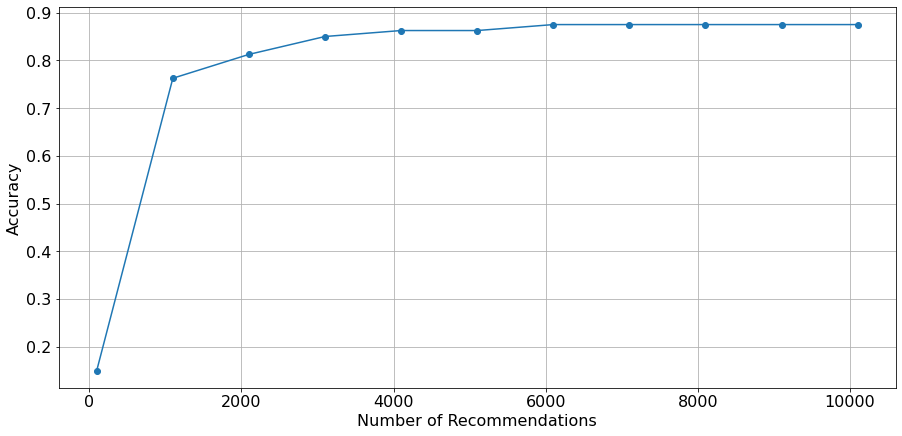

In [13]:
k = list(range(100,10101,1000))

plt.figure(figsize=(15,7))
plt.plot(k,acc3,'-o');
plt.grid()
plt.xlabel('Number of Recommendations')
plt.ylabel('Accuracy')
plt.show()